# nb08_IntroToHypothesisTesting

In [1]:
##Get them stats in here
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pylab as plt 
%matplotlib inline

### Lesson 26 Ex 1:  
Suppose I hand you a coin and ask you to determine whether or not it is fair.   

Prob. of exact outcome:  0.009765625000000002
Prob. of outcome or more H:  0.010742187500000002
Prob. of outcome or more H OR T:  0.021484375000000003


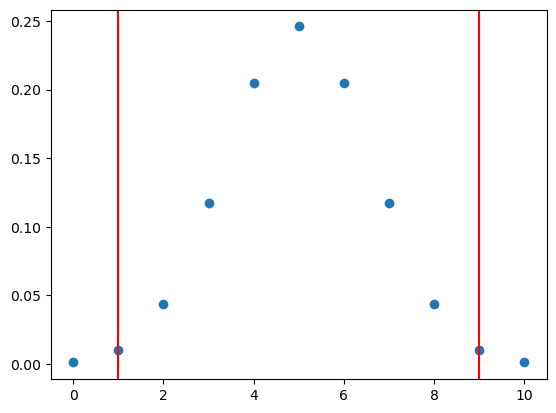

In [12]:
#So we flip our coin 10 times and we observe k heads.  So what?

nflips=10 #sample size
k=9 #observed heads; 
p=0.50

#Probability of exactly that many heads if the coin is fair
print('Prob. of exact outcome: ',stats.binom.pmf(k, n=nflips, p=p))

#Probability of that many heads OR MORE if the coin is fair
outcomes=np.linspace(0,nflips,nflips+1) #set of all outcomes for summand

print('Prob. of outcome or more H: ', np.sum([stats.binom.pmf(j, n=nflips, p=p) \
                                              for j in outcomes[outcomes>=k]]))
#Probability of that many (heads OR tails) OR MORE if coin is fair
print('Prob. of outcome or more H OR T: ', 2*np.sum([stats.binom.pmf(j, n=nflips, p=p) \
                                              for j in outcomes[outcomes>=k]]))
#NB: (prior line assumed k>n/2; else result is 1; if non-symmetry would need compound outcomes boolean)
##visually:

xgrd=np.linspace(0,nflips,nflips+1)
plt.scatter(xgrd, stats.binom.pmf(xgrd, n=nflips, p=.5)) #scatter over a line plot for a pmf
plt.axvline(k, color='red')
plt.axvline(nflips-k, color='red')


Ex 2).  Suppose you're willing to commit an error and classify a coin as unfair at most $10\%$ of the time.

a).  Suppose you flip the coin 10 times.  How many heads or tails would you have to see to conclude the coin is unfair?
b).  What if you flip it 100 times?
c).  What if you flip it 1000 times?

Prob. of outcome or more H OR T:  0.08862608011406749


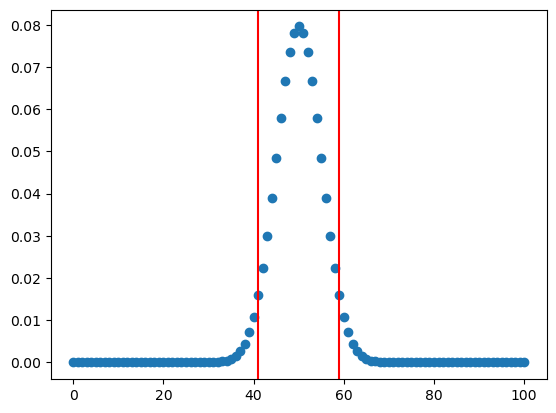

In [20]:
#So we flip our coin n times and we observe k heads.  So what?

#REJECTION REGIONS: how many H/T until that's 10% or less of the outcomes?
#Guess/Check for nflips=100 and nflips = 1000

nflips=100 #sample size
k=59 #observed heads; #Assumption:  k >=p*nflips
p=0.50
outcomes=np.linspace(0,nflips,nflips+1) #set of all outcomes forsummand

#Probability of that many (heads OR tails) OR MORE if coin is fair
print('Prob. of outcome or more H OR T: ', np.sum([stats.binom.pmf(j, n=nflips, p=p) \
                                              for j in outcomes[outcomes>=k]])+\
                                            np.sum([stats.binom.pmf(j, n=nflips, p=p) \
                                              for j in outcomes[outcomes<=(nflips-k)]])
      
     )
xgrd=np.linspace(0,nflips,nflips+1)
plt.scatter(xgrd, stats.binom.pmf(xgrd, n=nflips, p=.5)) #scatter over a line plot for a pmf
plt.axvline(k, color='red')
plt.axvline(nflips-k, color='red')



Do we always have to guess and check?

Suppose we want to find the values of "k" for the **rejection region** directly.  This lives in the .ppf!  

"Find the number of heads so that only 5% of the time we see that many heads on a fair coin" is a rephrasing of our goal.

In [21]:
nflips=100 #sample size
p=0.5

print(stats.binom.ppf(1-.05, n=nflips, p=p))

#This is giving the last value in the "accept" region, not the first in the reject region!
#why?  because above we have outcomes>=k, and .ppf looks for values of the form <=k, like a cdf.
#for a discrete RV, where we have the equals sign matters!

58.0


### Using Central Limit Theorem:
Final note: binomials with $np \geq 15$ and $n(1-p) \geq 15$ are *approximately normal* thanks to the Central Limit Theorem (see HW 8 #3).  In our case, $p=0.5$, so we can use this normal approximation for $n\geq30$.

Since a sample probability $\hat{p} \stackrel{approx}{\sim} N\left(p,\frac{p(1-p)}{n} \right)$

we can get the same number of heads/tails by asking about what $z$-value represents "a 10% error" and then convert that number back to probabilities by adding in the **mean** p and multiplying in the **standard deviation** $\sqrt{\frac{p(1-p)}{n}}$

In [5]:
nflips=100 #sample size
p=0.5
z_score=stats.norm.ppf(1-.05) #LOCATION on the normal with 5% "error" area above
#this also means we have the other 5% error area below (-1)*z_score.

#converted to probabilities
#that region's z-value spread out to match probabilities, then centered at .5
prob_region=p+z_score*np.sqrt(p*(1-p)/nflips) 
print('Reject if proportion of heads/tails is at least', prob_region)
print('Reject if number of heads/tails is at least', nflips*prob_region)

Reject if proportion of heads/tails is at least 0.5822426813475736
Reject if number of heads/tails is at least 58.22426813475736


## Hypothesis Tests and P-Values in Python

Ex 2 cont'd):  To determine if the Belgian 1 Euro coin is fair, you flip it 250 times and it comes up heads 140 times.  Do you reject the null at the 0.10 significance level or not?

**Step 1**:  State null and alternative hypotheses:
$H_0:  p=0.5$
$H_A:  p \neq 0.5$

**Step 2**: Select a level of significance.   **This is already given to us in the problem statement:  $\alpha = .10$**

**Step 3**:  Gather data and calculate the test statistic.

Let $H$ be the random variable that denotes the number of heads assuming the null hypothesis.   

From our data, our test statistic is:

$H_{test} = 140$

**Step 4**: 

Our null hypothesis is that $p=0.5$, and because the number of heads is a binomial distribution, we have $H \sim Bin(250, 0.5)$ under the null hypothesis

Use a decision rule:

Option 1:
Calculate the p-value for the test statistic:  
This is a two tailed test:

In [6]:
#using the pmf:
nflips=250 #sample size
k=140 #observed heads; #Assumption:  k >=p*nflips
p=0.50
outcomes=np.linspace(0,nflips,nflips+1) #set of all outcomes forsummand

#Probability of that many (heads OR tails) OR MORE if coin is fair
print('Prob. of outcome or more H OR T (i.e. p-value): ', np.sum([stats.binom.pmf(j, n=nflips, p=p) \
                                              for j in outcomes[outcomes>=k]])+\
                                            np.sum([stats.binom.pmf(j, n=nflips, p=p) \
                                              for j in outcomes[outcomes<=(nflips-k)]])
      
     )

Prob. of outcome or more H OR T (i.e. p-value):  0.06642115124004327


In [7]:
#Or using cdf and pmf:
2*(1-stats.binom.cdf(140,250,.5)+stats.binom.pmf(140, 250,.5))

0.0664211512400435

**Step 5:  Since p-value<=0.10, we REJECT THE NULL at the 10% significance level.    Thus we have reasonable evidence to assume this coin is NOT fair**

Option 2:  
Calculate critical value and compare to test statistic.  

In [8]:
nflips=250 #sample size
p=0.5
z_score=stats.norm.ppf(1-.05) #LOCATION on the normal with 5% "error" area above
#this also means we have the other 5% error area below (-1)*z_score.

#converted to probabilities
#that region's z-value spread out to match probabilities, then centered at .5
prob_region=p+z_score*np.sqrt(p*(1-p)/nflips) 
print('Reject if number of heads/tails is at least', nflips*prob_region)

Reject if number of heads/tails is at least 138.00370969688893


**Since our test statistic = 140>138, we can reject the null at the 10% significance level and accept the alternative hypothesis that the coin is NOT fair.**

In [9]:
nflips=250 #sample size
k=140 #observed heads; 
p=0.50
outcomes=np.linspace(0,nflips,nflips+1) #set of all outcomes forsummand

#Probability of that many (heads OR tails) OR MORE if coin is fair
print('Prob. of outcome or more H OR T: ', np.sum([stats.binom.pmf(j, n=nflips, p=p) \
                                              for j in outcomes[outcomes>=k]])+\
                                            np.sum([stats.binom.pmf(j, n=nflips, p=p) \
                                              for j in outcomes[outcomes<=(nflips-k)]])
      
     )

Prob. of outcome or more H OR T:  0.06642115124004327


## Using Central Limit Theorem Approximation 

Thanks to the central limit theorem, as we showed above we have:

$\hat{p} \stackrel{approx}{\sim} N\left(p,\frac{p(1-p)}{n} \right)$

Thus we could run an equivalent test by instead using the test statistic: $p_{test} = \frac{140}{250}$

The p-value is calculated by finding $P(\hat{p} \geq \frac{140}{250})$, where $\hat{p} \stackrel{approx}{\sim} N\left(p,\frac{p(1-p)}{n} \right)$

Python has built-in functions to do this work for you:  https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html

To test a hypothesis about a proportion using this built-in function:   

In [10]:
from statsmodels.stats.proportion import proportions_ztest
#--------perform a one proportion z-test using the invoked function
#----count = number of successes (in this case number of Heads)
#-----nobs = number of observations (in this case 250) 
#-----value: Hypothesized proportion (in this 50% for a fair coin)
#----prop_var = Proportion to use when calculating the variance (use the p from our null hypothesis)
test_stat, pvalue = proportions_ztest(count=140, nobs=250, value=0.50, prop_var=.5)

print("The p-value is", pvalue)


The p-value is 0.05777957112359698


This is a close approximation of the actual p-value (0.066) we found above, and it is consistent with our decision to reject the null hypothesis. 

## Comparing Two Proportions:

Recall our titanic dataset from the beginning of the semester:
Load `clean_titanic_data` into Python.


In [11]:
# Path to the data - select the path that works for you 
file_path = 'clean_titanic_data.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

# Look at the data.
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'clean_titanic_data.csv'

Determine the proportion of men vs women who survived:

In [ ]:
male_survived = df.loc[df['Sex']=='male', 'Survived'].sum()
print("{} men survived the disaster".format(male_survived))
male_total = len(df.loc[(df["Sex"]=='male')])
print("... out of {} men total".format(male_total))


female_survived = df.loc[df['Sex']=='female', 'Survived'].sum() # your code goes here! 
print("{} women survived the disaster".format(female_survived))
female_total = len(df.loc[(df["Sex"]=='female')])
print("... out of {} women total".format(female_total))

Let $p_1$ = survival rate of men  and 
$p_2$ = survival rate of women

Suppose we wanted to test whether there was a statistically significant difference in survival rates between men and women at the 0.01% significance level:

i.e. $H_0:  p_1 = p_2$
and  $H_A:  p_1 \neq p_2$

To conduct this test in python we use:

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
#----count = number of successes (in this case number of Heads)
#-----nobs = number of observations (in this case 250) 
#-----value: Hypothesized difference in proportions.  Default is 0
#----prop_var:  Proportion to use when calculating the variance (use the p from our null hypothesis, 
#which assumes there's no difference in the survival distribution between men and women:
#i.e. use p= (p1+p2)/(n1+n2))

count = np.array([93, 197])
nobs = np.array([453, 261])
stat, pval = proportions_ztest(count, nobs, prop_var=(93+197)/(453+261))
print(pval)

Since our p-value <0.01 we can REJECT the null and accept the alternative hypothesis that there IS a statistically significant difference between the survival rates of men vs women at the 0.01 significance level.